In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
data_folder = '../dataset/predict'
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

In [19]:
data_frames = []

for file in csv_files:
    file_path = os.path.join(data_folder, file)
    try:
        df = pd.read_csv(file_path)
        df = df[['year', 'period', 'value', 'state_name']].copy()
        df['month'] = df['period'].str.extract(r'M(\d{2})').astype(int)
        df['year'] = df['year'].astype(int)
        df['unemployment_rate'] = df['value'].astype(float)
        df['state'] = df['state_name'].str.strip()
        df_1 = df[['state', 'year', 'month', 'unemployment_rate']]
        data_frames.append(df_1)
    except Exception as e:
        print(f"Error reading {file}: {e}")

combined_df = pd.concat(data_frames, ignore_index=True)
print(combined_df)

        state  year  month  unemployment_rate
0    Illinois  2025      3           4.884520
1    Illinois  2025      4           4.910559
2    Illinois  2025      5           4.914599
3    Illinois  2025      6           4.924919
4    Illinois  2025      7           4.898541
..        ...   ...    ...                ...
619  Delaware  2025     10           4.247261
620  Delaware  2025     11           4.275733
621  Delaware  2025     12           4.302518
622  Delaware  2026      1           4.352659
623  Delaware  2026      2           4.346461

[624 rows x 4 columns]


In [20]:
import seaborn as sns

In [21]:
combined_df['date'] = pd.to_datetime(combined_df[['year','month']].assign(DAY=1))
print(combined_df)

        state  year  month  unemployment_rate       date
0    Illinois  2025      3           4.884520 2025-03-01
1    Illinois  2025      4           4.910559 2025-04-01
2    Illinois  2025      5           4.914599 2025-05-01
3    Illinois  2025      6           4.924919 2025-06-01
4    Illinois  2025      7           4.898541 2025-07-01
..        ...   ...    ...                ...        ...
619  Delaware  2025     10           4.247261 2025-10-01
620  Delaware  2025     11           4.275733 2025-11-01
621  Delaware  2025     12           4.302518 2025-12-01
622  Delaware  2026      1           4.352659 2026-01-01
623  Delaware  2026      2           4.346461 2026-02-01

[624 rows x 5 columns]


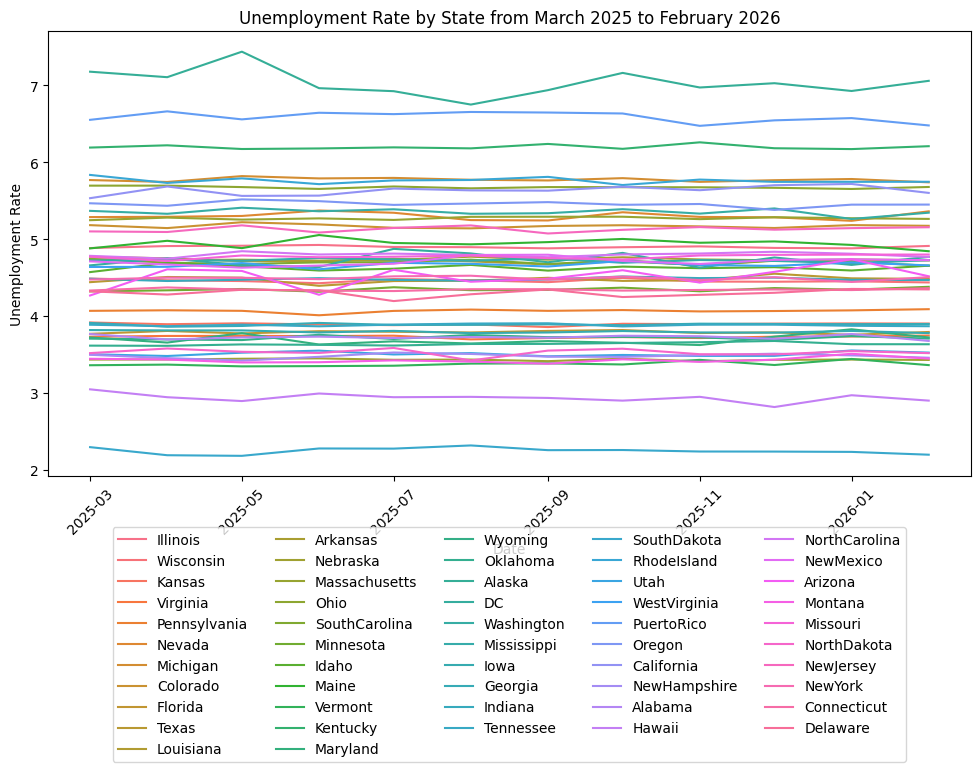

In [28]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=combined_df, x='date', y='unemployment_rate', hue='state')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.xticks(rotation=45)
plt.title('Unemployment Rate by State from March 2025 to February 2026')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')

plt.tight_layout()
plt.show()